In [1]:
import porespy as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from genrandsp import *

## Method I : Porosity

In [2]:
gsp = generate_spherepack([200, 200, 200], [12, 8, 4], 0.25, loop_limits=20000)

In [3]:
sphere_coords = gsp.method_I(0.7)

Loop #00500, n_spheres=00387, porosity=0.8555
Loop #01000, n_spheres=00628, porosity=0.8301
Loop #01500, n_spheres=00833, porosity=0.8153
Loop #02000, n_spheres=00970, porosity=0.8058
Removed 12 from the list of sphere sizes at loop 2000...
Loop #02000, n_spheres=00970, porosity=0.8058
Loop #02500, n_spheres=01103, porosity=0.7979
Loop #03000, n_spheres=01200, porosity=0.7937
Loop #03500, n_spheres=01292, porosity=0.7899
Loop #04000, n_spheres=01356, porosity=0.7875
Removed 8 from the list of sphere sizes at loop 4000...
Loop #04000, n_spheres=01356, porosity=0.7875
Loop #04500, n_spheres=01438, porosity=0.7848
Loop #05000, n_spheres=01521, porosity=0.7820
Loop #05500, n_spheres=01583, porosity=0.7799
Loop #06000, n_spheres=01643, porosity=0.7779
Loop #06500, n_spheres=01705, porosity=0.7758
Loop #07000, n_spheres=01766, porosity=0.7738
Loop #07500, n_spheres=01828, porosity=0.7717
Loop #08000, n_spheres=01881, porosity=0.7699
Loop #08500, n_spheres=01925, porosity=0.7684
Loop #09000, 

In [4]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

               X           Y           Z     R
0     106.252094  168.714300   92.854050   4.0
1      45.131179   24.467927   22.782503  12.0
2      88.079592   91.005417  159.865756  12.0
3     123.446405   61.364392  132.178170  12.0
4      44.078573   80.801646   28.020332  12.0
...          ...         ...         ...   ...
2592  140.103509  110.969055  100.727279   4.0
2593  120.576915  129.052370  152.450768   4.0
2594   72.575312  123.754030   41.065814   4.0
2595   95.576052  178.174000   57.037985   4.0
2596   82.308433  101.920722  128.843725   4.0

[2597 rows x 4 columns]


186.9840551364615

Generate Image using porespy

In [5]:
im = ps.generators.spheres_from_coords(df)

In [6]:
print(f"Image poro : {1-np.count_nonzero(im)/im.size:.4f}")
print(f"Image size : {im.shape}")

Image poro : 0.7489
Image size : (199, 198, 201)


Save Image as numpy array

In [7]:
np.save('rand_sphere_pack_M1',im)

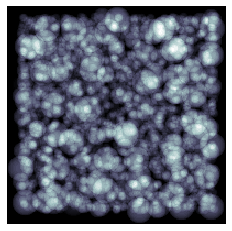

In [8]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

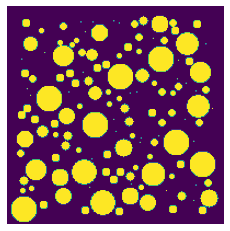

In [10]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,np.random.randint(0, len(im))])
ax.axis(False);

## Method II : Number of Spheres

In [11]:
gsp = generate_spherepack([200, 200, 200], [8, 15, 7], 0.25)

In [12]:
sphere_coords = gsp.method_II(2000)

Loop #00500, n_spheres=00293, porosity=0.8390
Loop #01000, n_spheres=00416, porosity=0.8123
Loop #01500, n_spheres=00473, porosity=0.8003
Loop #02000, n_spheres=00516, porosity=0.7910
Removed 15 from the list of sphere sizes at loop 2000...
Loop #02000, n_spheres=00516, porosity=0.7910
Loop #02500, n_spheres=00548, porosity=0.7842
Loop #03000, n_spheres=00577, porosity=0.7783
Loop #03500, n_spheres=00598, porosity=0.7738
Loop #04000, n_spheres=00613, porosity=0.7709
Removed 8 from the list of sphere sizes at loop 4000...
Loop #04000, n_spheres=00613, porosity=0.7709
Loop #04500, n_spheres=00623, porosity=0.7692
Loop #05000, n_spheres=00630, porosity=0.7679
Loop #05500, n_spheres=00638, porosity=0.7665
Loop #06000, n_spheres=00644, porosity=0.7654
Loop #06500, n_spheres=00654, porosity=0.7636
Loop #07000, n_spheres=00659, porosity=0.7627
Loop #07500, n_spheres=00667, porosity=0.7612
Loop #08000, n_spheres=00672, porosity=0.7603
Loop #08500, n_spheres=00683, porosity=0.7584
Loop #09000, 

In [13]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

              X           Y           Z     R
0    155.346271   58.762912   29.710539   7.0
1    103.417340  119.495675   41.724252  15.0
2     22.910292  160.847283   60.982165  15.0
3     56.873645  146.155181   98.102935   8.0
4     75.871053   58.555887  104.657847   8.0
..          ...         ...         ...   ...
691  166.379192  143.341063   78.500236   7.0
692   78.970183  113.692144  120.572621   7.0
693   77.154388   38.152214   24.321527   7.0
694  120.563550  133.352978   38.430063   7.0
695   47.706212   89.211879   73.451662   7.0

[696 rows x 4 columns]


183.97105135098883

Generate Image using porespy

In [14]:
im = ps.generators.spheres_from_coords(df)

In [15]:
print(f"Image poro : {1-np.count_nonzero(im)/im.size:.4f}")
print(f"Image size : {im.shape}")

Image poro : 0.7542
Image size : (198, 201, 198)


Save Image as numpy array

In [16]:
np.save('rand_sphere_pack_M2',im)

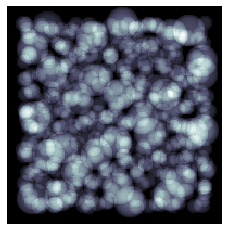

In [17]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

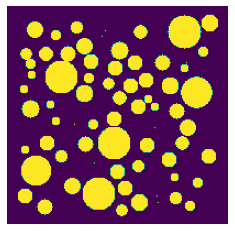

In [18]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,np.random.randint(0, len(im))])
ax.axis(False);